# Anemómetro - Ondeando Banderas

## 0. Cargar librerías

In [2]:
import librosa
import librosa.display
import scipy as sp
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

## 1. Cargar audios

In [3]:
# Creamos las listas que contienen los archivos de audio

fan_audios = ['v1 - fan.wav', 'v2 - fan.wav', 'v3 - fan.wav', 'v4 - fan.wav', 'v5 - fan.wav', 'v6 - fan.wav', 'v7 - fan.wav',
             'v8 - fan.wav', 'v9 - fan.wav']
a_up_audios = ['v1 - a up.wav', 'v2 - a up.wav', 'v3 - a up.wav', 'v4 - a up.wav', 'v5 - a up.wav', 'v6 - a up.wav', 'v7 - a up.wav',
             'v8 - a up.wav', 'v9 - a up.wav']
a_down_audios = ['v1 - a down.wav', 'v2 - a down.wav', 'v3 - a down.wav', 'v4 - a down.wav', 'v5 - a down.wav', 'v6 - a down.wav', 'v7 - a down.wav',
        'v8 - a down.wav', 'v9 - a down.wav']
b_up_audios = ['v1 -  b up.wav', 'v2 - b up.wav', 'v3 - b up.wav', 'v4 - b up.wav', 'v5 - b up.wav', 'v6 - b up.wav', 'v7 - b up.wav',
    'v8 - b up.wav', 'v9 - b up.wav']
b_down_audios = ['v1 - b down.wav', 'v2 - b down.wav', 'v3 - b down.wav', 'v4 - b down.wav', 'v5 - b down.wav', 'v6 - b down.wav', 'v7 - b down.wav',
        'v8 - b down.wav', 'v9 - b down.wav']

In [4]:
# Corte (en segundos) en los que se tomarán las muestras de 5 seg
inicios = [2,7,12,17,22,27]

In [5]:
def cargar(archivo,inicio):
    audio, ar = librosa.load(archivo, offset=inicio, duration=5)
    return audio, ar

In [6]:
# Función para cargar los audios
dir = '../Montaje_experimental/Audios/' #Direccion con los datos 
def cargar_audios(audio_files, start_times):
    audio_list = []
    audio_sr_list = []

    for audio_file in audio_files:
        for start_time in start_times:
            audio, ar = cargar(dir+str(audio_file), start_time)
            audio_list.append(audio)
            audio_sr_list.append(ar)

    return audio_list, audio_sr_list

In [7]:
# Cargar todos los audios
fan, fan_sr = cargar_audios(fan_audios, inicios)
a_up, a_up_sr = cargar_audios(a_up_audios, inicios)
a_down, a_down_sr = cargar_audios(a_down_audios, inicios)
b_up, b_up_sr = cargar_audios(b_up_audios, inicios)
b_down, b_down_sr = cargar_audios(b_down_audios, inicios)

## 2. Resta de audios (eliminación de ruido)

In [8]:
#Función  para la resta
def calcular_final(ventilador, lista):
    return [total - fan for total, fan in zip(lista, ventilador)]

a_up_final = calcular_final(fan, a_up)
a_down_final = calcular_final(fan, a_down)
b_up_final = calcular_final(fan, b_up)
b_down_final = calcular_final(fan, b_down)

### 2.1 Visualización (Amplitud vs Tiempo)

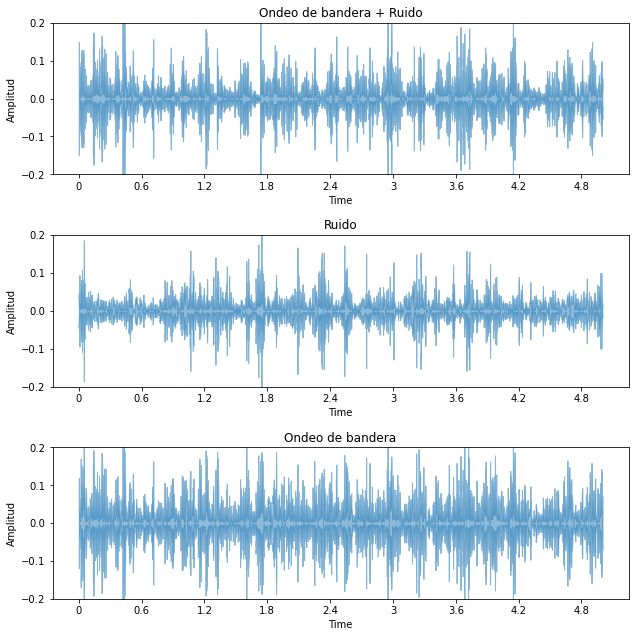

In [9]:
plt.figure(figsize=(10, 10))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.subplot(3, 1, 1)
librosa.display.waveshow(b_up[40], alpha=0.5)
plt.ylabel('Amplitud')
plt.ylim((-0.2, 0.2))
plt.title("Ondeo de bandera + Ruido")

plt.subplot(3, 1, 2)
librosa.display.waveshow(fan[40], alpha=0.5)
plt.ylim((-0.2, 0.2))
plt.ylabel('Amplitud')
plt.title('Ruido')

plt.subplot(3, 1, 3)
librosa.display.waveshow(b_up_final[40], alpha=0.5)
plt.ylim((-0.2, 0.2))
plt.ylabel('Amplitud')
plt.title('Ondeo de bandera')

plt.show()

## 3. Transformada de Fourier

In [10]:
def transformada(lista,posicion):
    ft = sp.fft.fft(lista[posicion])
    magnitude = np.absolute(ft)
    frequency = np.linspace(0,22050,len(magnitude))
    return ft, magnitude, frequency

In [11]:
a_up_frequency = []
a_up_magnitude = []
a_down_frequency = []
a_down_magnitude = []
b_up_frequency = []
b_up_magnitude = []
b_down_frequency = []
b_down_magnitude = []

In [12]:
def procesar_datos(datos_final):
    frequency_list = []
    magnitude_list = []

    for i in range(54):
        lista_tf, lista_magnitude, lista_frequency = transformada(datos_final, i)
        frequency_list.append(lista_frequency)
        magnitude_list.append(lista_magnitude)

    return frequency_list, magnitude_list

In [13]:
# Para a_up
a_up_frequency, a_up_magnitude = procesar_datos(a_up_final)

# Para a_down
a_down_frequency, a_down_magnitude = procesar_datos(a_down_final)

# Para b_up
b_up_frequency, b_up_magnitude = procesar_datos(b_up_final)

# Para b_down
b_down_frequency, b_down_magnitude = procesar_datos(b_down_final)

### 3.1 Visualización de potencia espectral (frecuencia vs magnitud)

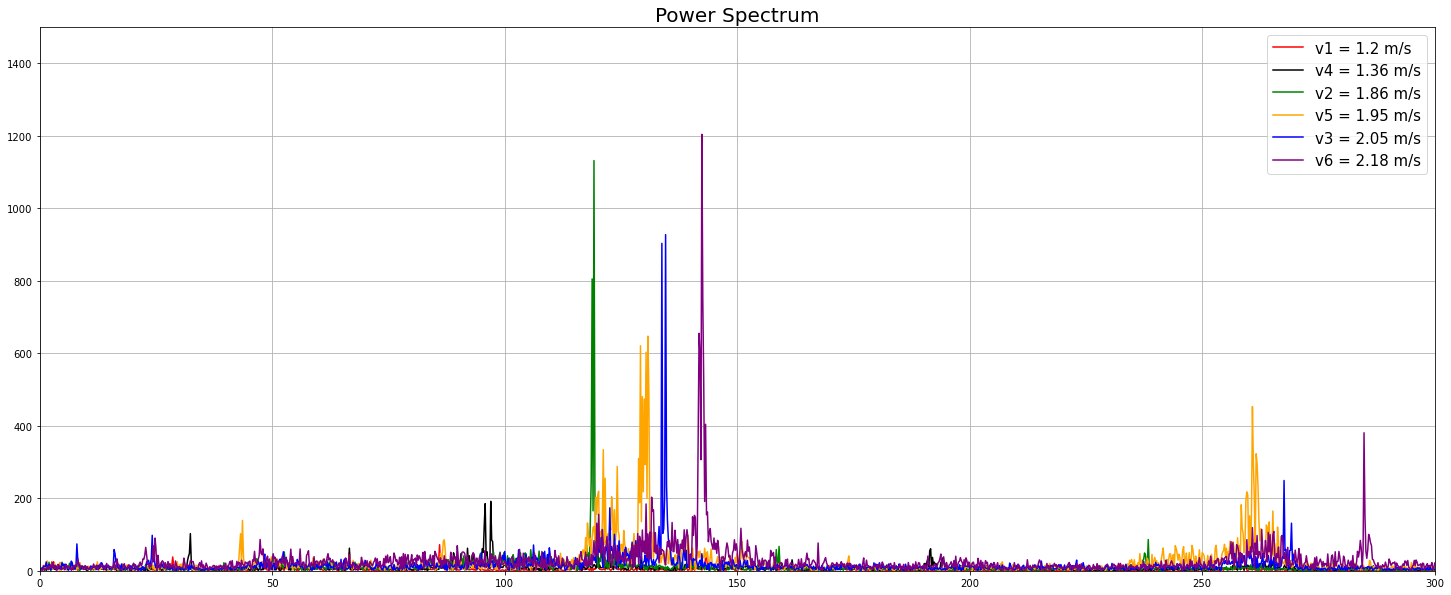

In [15]:
# Definir las combinaciones de frecuencia y magnitud que quieres graficar
combos = [
    (5, 'r', 'v1 = 1.2 m/s'),
    (23, 'black', 'v4 = 1.36 m/s'),
    (11, 'g', 'v2 = 1.86 m/s'),
    (28, 'orange', 'v5 = 1.95 m/s'),
    (15, 'b', 'v3 = 2.05 m/s'),
    (35, 'purple', 'v6 = 2.18 m/s')
]

plt.figure(figsize=(25, 10))

# Iterar sobre las combinaciones y trazar los gráficos
for index, color, label in combos:
    plt.plot(b_up_frequency[index][:5000], b_up_magnitude[index][:5000], color=color, label=label) #Cambiar configuración

plt.ylim(0, 1500)
plt.xlim(0, 300)
plt.legend(fontsize=15)
plt.title('Power Spectrum', fontsize=20)
plt.grid()
plt.show()

Se encuentra que la mejor configuración (aquella con los picos más pronunciados) corresponde a b_up. Por lo que se trabajará con esta. Para visualizar las demás configuraciones basta con cambiar en la sección indicada en la función. 

## 4. Frecuencias de mayor magnitud para cada velocidad

In [95]:
#Definimos listas que contendrán las frecuencias de mayor magnitud de cada velocidad
frecuencias_v1 = []
frecuencias_v3 = []
frecuencias_v5 = []
frecuencias_v2 = []
frecuencias_v4 = []
frecuencias_v6 = []

In [96]:
# Agurpamos los índices por velocidad
categorias = {
    "frecuencias_v1": (0, 5),
    "frecuencias_v3": (6, 11),
    "frecuencias_v5": (12, 17),
    "frecuencias_v2": (18, 23),
    "frecuencias_v4": (24, 29),
    "frecuencias_v6": (30, 35)
}


In [97]:
for categoria, (inicio, fin) in categorias.items():
    for indice in range(inicio, fin + 1):
        frecuencia_arreglo = b_up_frequency[indice]
        magnitud_arreglo = b_up_magnitude[indice]

        frecuencia_maxima, _ = encontrar_frecuencia_maxima(frecuencia_arreglo, magnitud_arreglo)

        # Almacenar la frecuencia máxima en el arreglo correspondiente
        globals()[categoria].append(frecuencia_maxima)

In [98]:
# Imprimir los resultados
print("Frecuencias v1:", frecuencias_v1)
print("Frecuencias v3:", frecuencias_v3)
print("Frecuencias v5:", frecuencias_v5)
print("Frecuencias v2:", frecuencias_v2)
print("Frecuencias v4:", frecuencias_v4)
print("Frecuencias v6:", frecuencias_v6)

Frecuencias v1: [85.80077823835137, 86.00078005242678, 86.2007818665022, 86.2007818665022, 86.2007818665022, 86.00078005242678]
Frecuencias v3: [119.40108300302045, 119.40108300302045, 119.20108118894503, 119.00107937486962, 119.20108118894503, 119.20108118894503]
Frecuencias v5: [133.80121361645004, 133.60121180237462, 134.8012226868271, 134.6012208727517, 133.80121361645004, 134.40121905867628]
Frecuencias v2: [98.40089252510228, 98.40089252510228, 96.40087438434816, 97.00087982657439, 96.80087801249898, 97.00087982657439]
Frecuencias v4: [129.6011755208664, 130.20118096309264, 130.00117914901722, 129.80117733494183, 130.80118640531887, 129.80117733494183]
Frecuencias v6: [143.40130069206978, 144.00130613429602, 143.20129887799436, 143.20129887799436, 143.20129887799436, 142.4012916216927]


In [99]:
# Encontramos el promedio de frecuencia máxima para cada arreglo, con su deviación estándar
promedio_v1 = np.mean(frecuencias_v1)
desviacion_estandar_v1 = np.std(frecuencias_v1)

promedio_v3 = np.mean(frecuencias_v3)
desviacion_estandar_v3 = np.std(frecuencias_v3)

promedio_v5 = np.mean(frecuencias_v5)
desviacion_estandar_v5 = np.std(frecuencias_v5)

promedio_v2 = np.mean(frecuencias_v2)
desviacion_estandar_v2 = np.std(frecuencias_v2)

promedio_v4 = np.mean(frecuencias_v4)
desviacion_estandar_v4 = np.std(frecuencias_v4)

promedio_v6 = np.mean(frecuencias_v6)
desviacion_estandar_v6 = np.std(frecuencias_v6)

In [121]:
# Almacenamos
final_frecuencias = np.array([promedio_v1, promedio_v2, promedio_v3, promedio_v4, promedio_v5, promedio_v6])
std_final = np.array([desviacion_estandar_v1, desviacion_estandar_v2, desviacion_estandar_v3, desviacion_estandar_v4, desviacion_estandar_v5, desviacion_estandar_v6])
velocidades = np.array([1.2, 1.4, 1.9, 2, 2.1, 2.2])

## 5. Ajuste lineal - Anemómetro

In [122]:
from scipy.optimize import curve_fit

In [123]:
def func1(x, a, b):
    return a*x+b

In [124]:
popt1, pcov1 = curve_fit(func1, final_frecuencias, velocidades)
popt1

array([ 0.01802804, -0.33353828])

In [125]:
pcov1

array([[ 1.05732709e-06, -1.25129922e-04],
       [-1.25129922e-04,  1.52474593e-02]])

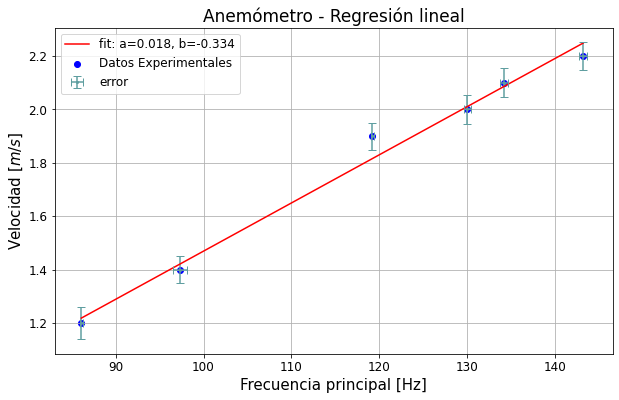

In [126]:
plt.figure(figsize=(10,6))
plt.plot(final_frecuencias, func1(final_frecuencias, *popt1), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt1))
plt.scatter(final_frecuencias,velocidades,label="Datos Experimentales",color='blue')
plt.errorbar(final_frecuencias, velocidades,
             xerr = std_final,
             yerr = [0.06,0.052,0.051,0.054,0.054,0.051],
             fmt ='o',color='cadetBlue', markersize=2, capsize=4, label='error')
plt.legend(loc=2,fontsize=12)
plt.xlabel('Frecuencia principal [Hz]',fontsize=15)
plt.ylabel('Velocidad $[m/s]$',fontsize=15)
plt.title('Anemómetro - Regresión lineal',fontsize=17)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.show()